## Data Analysis Project Life Cycle
- **Business problem understanding**
- **Data Collection**
- **Data Pre-Processing**
- **Data Analysis**
- **Reporting**

### Business Problem
- **Client want us to analyse diwali sales data in order to understand the trends  , insights  , top performing products , categories , zones so then can prepare better to improve sales**

## Data Collection
- **Client has provided data in csv file**
- **Link:** https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=drive_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Rocky Yadav\Downloads\Diwali_Sales_Data.csv" , encoding = 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952,NaN,NaN
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924,NaN,NaN
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877,NaN,NaN


In [4]:
# Creating a copy of the data
data = df.copy()

### Data PreProcessing
- **Data Profiling**
- **Data Cleaning**
- **Data Consistency**
- **Data Formatting**
- **Outlier Detection and Removal**

In [5]:
data.shape

(11345, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11321 non-null  float64
 1   Cust_name         11344 non-null  object 
 2   Product_ID        11341 non-null  object 
 3   Gender            11341 non-null  object 
 4   Age Group         11339 non-null  object 
 5   Age               11334 non-null  object 
 6   Marital_Status    11339 non-null  float64
 7   State             11332 non-null  object 
 8   Zone              11334 non-null  object 
 9   Occupation        11339 non-null  object 
 10  Product_Category  11334 non-null  object 
 11  Orders            11342 non-null  float64
 12  Amount            11331 non-null  object 
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(5), object(10)
memory usage: 1.3+ MB


In [7]:
data.isna().sum()

User_ID                24
Cust_name               1
Product_ID              4
Gender                  4
Age Group               6
Age                    11
Marital_Status          6
State                  13
Zone                   11
Occupation              6
Product_Category       11
Orders                  3
Amount                 14
Status              11345
unnamed1            11345
dtype: int64

In [8]:
# All Columns
all_columns = data.columns
all_columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [9]:
# Numeric columns
num_columns = data.select_dtypes(include = np.number).columns
num_columns

Index(['User_ID', 'Marital_Status', 'Orders', 'Status', 'unnamed1'], dtype='object')

In [10]:
#Non Numeric columns
non_num_columns = data.select_dtypes(include = object).columns
non_num_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Amount'],
      dtype='object')

In [11]:
#Duplicate Values
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11340    False
11341    False
11342    False
11343     True
11344    False
Length: 11345, dtype: bool

In [12]:
# Filtering
data = data[~data.duplicated()]
data[data.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


In [13]:
data["Occupation"].isna().sum()

6

### Data Profilling
1.**Amount**
   - Need to change the data type from object to integer
   - The rows corresponding null values should be dropped
   - Need to drop the rows corresponding to inconsistent values

2.**Satatus & nunamed**
   - No data should be droped

3.**Orders**
   - Null Values has to be dropped
   - There are outlier which should be removed

4.**State**
   - 'Andhra\xa0Pradesh' & 'Nndhra\xa0Pradesh' should be replaced with AndraPradesh
   - Drop the rows corresponding to null values

5.**Zone**
   - Drop the rows corresponding to null values
   - 'Zentral' should with 'Central'

6.**Product_ID**
   - Drop the rows corresponding to null values

7.**Marital_Status**
   - Null values can be replaced with mode
   - Will create a new column where 1 can be replaced with 'married' and 0 can be replaced with 'unmarried'

8.**Age**
   -  'Age' can be replaced with mode
   -  Null values can be replaced with mode
   -  Data type can be changed to numberic

9.**Age Group**
   - 'low-high' can be replaced with mode
   -  Null values can be replaced with mode

10.**Product_Category**
   - Null Value can be dropped

11.**Occupation & Gender**
   - Null values can be replaced with mode

### Data Cleaning

In [14]:
# Droping columns
data.drop(['Status'  ,'unnamed1'],axis = 1 , inplace = True)

In [15]:
data.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934


### Amount

In [16]:
# Changing data type
data["Amount"] = pd.to_numeric(df['Amount'] , errors = 'coerce') # coerce will convert unsupported values to null values

In [17]:
data["Amount"].isna().sum()

17

In [18]:
# Droping the rows corresponding to null values in the columns : [ 'Amount' , 'Order' , 'State' , 'Zone' , 'Product_ID' , 'Product_Category']
data.dropna(subset = ['Amount' , 'Orders' , 'State' , 'Zone' , 'Product_ID' , 'Product_Category'] , inplace = True)

### State & Zone

In [19]:
# Replacing the Typo
data["State"] = data["State"].str.replace('Andhra\xa0Pradesh', 'Andhra Pradesh')
data["State"] = data["State"].str.replace('Nndhra\xa0Pradesh', 'Andhra Pradesh')

In [20]:
data["State"].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Haryana', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [21]:
data["Zone"].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Zentral', 'Eastern'],
      dtype=object)

In [22]:
data["Zone"] = data["Zone"].str.replace('Zentral', 'Central')

In [23]:
data["Zone"].unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

#### Product_ID
**Already cleaned**

#### Marital_Status

In [24]:
# Replacing the null values with null values
marital_status_mode = data["Marital_Status"].mode()[0]
marital_status_mode

0.0

In [25]:
data["Marital_Status"] = data["Marital_Status"].fillna(marital_status_mode)

In [26]:
data["Marital_Status"].isna().sum()

0

In [27]:
# Creating a new column married_status
data["married_status"] = data["Marital_Status"].apply(lambda x: 'Married' if x == 1.0 else 'Unmarried')

In [28]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,married_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married
2,1001990.0,Bindu,P00118542,F,26-35,35,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,Married
3,1001425.0,Sudevi,P00237842,M,0-17,16,0.0,Karnataka,Southern,Construction,Auto,2.0,23912.0,Unmarried
4,1000588.0,Joni,P00057942,M,26-35,28,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877.0,Married


#### Age

In [29]:
# Changing data type from object to numeric
data["Age"] = pd.to_numeric(df['Age'] , errors = 'coerce')

In [30]:
data["Age"].isna().sum()

11

In [31]:
# Replace the null values with mode
age_mode = data["Age"].mode()[0]
age_mode

30.0

In [32]:
data["Age"] = data["Age"].fillna(age_mode)

In [33]:
data["Age"].isna().sum()

0

In [34]:
data["Age"].unique()

array([28., 35., 16., 25., 30., 29., 54., 19., 46., 53., 83., 33., 40.,
       39., 20., 32., 36., 55., 27., 72., 45., 21., 38., 37., 23., 34.,
       49., 42., 24., 52., 50., 48., 31., 44., 43., 26., 47., 41., 66.,
       22., 15., 51., 77., 87., 79., 71., 88., 58., 82., 62., 92., 12.,
       63., 17., 18., 13., 67., 90., 56., 75., 81., 64., 73., 84., 14.,
       76., 86., 89., 68., 61., 91., 85., 70., 80., 65., 74., 69., 78.,
       57., 60., 59.])

#### Age Group

In [35]:
# Replacing the null values and typo with mode
age_group_mode = data["Age Group"].mode()[0]
age_group_mode

'26-35'

In [36]:
data["Age Group"] = data["Age Group"].str.replace('low-high' , age_group_mode)
data["Age Group"] = data["Age Group"].fillna(age_group_mode)

In [37]:
data["Age Group"].unique()

array(['26-35', '0-17', '18-25', '51-55', '55+', '36-45', '46-50'],
      dtype=object)

#### Product_Category
**Already Done**

#### Occupation & Gender

In [38]:
# Replacing null values with modes
gender_mode = data["Gender"].mode()[0]
occupation_mode = data["Occupation"].mode()[0]
gender_mode
occupation_mode

'IT Sector'

In [39]:
data["Gender"] = data["Gender"].fillna(gender_mode)
data["Occupation"] = data["Occupation"].fillna(gender_mode)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  married_status    11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [41]:
user_ID_mode = data["User_ID"].mode()[0]
data["User_ID"] = data["User_ID"].fillna(user_ID_mode)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11254 entries, 0 to 11340
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11254 non-null  float64
 1   Cust_name         11254 non-null  object 
 2   Product_ID        11254 non-null  object 
 3   Gender            11254 non-null  object 
 4   Age Group         11254 non-null  object 
 5   Age               11254 non-null  float64
 6   Marital_Status    11254 non-null  float64
 7   State             11254 non-null  object 
 8   Zone              11254 non-null  object 
 9   Occupation        11254 non-null  object 
 10  Product_Category  11254 non-null  object 
 11  Orders            11254 non-null  float64
 12  Amount            11254 non-null  float64
 13  married_status    11254 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [44]:
data.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
married_status      0
dtype: int64

In [45]:
data.to_excel("Filtered_Diwali_Data.xlsx")

### Outlier Detection and Removal

In [43]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125400e+04,11254.000000,11254.000000,11254.000000,1.125400e+04
mean,1.013664e+06,35.424382,0.419762,2.494135,1.916697e+05
std,3.263686e+05,12.753259,0.493542,1.186925,1.072906e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.445000e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004430e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,40.000000,8.760212e+08


Text(0.5, 0.98, 'Overall Figure Title')

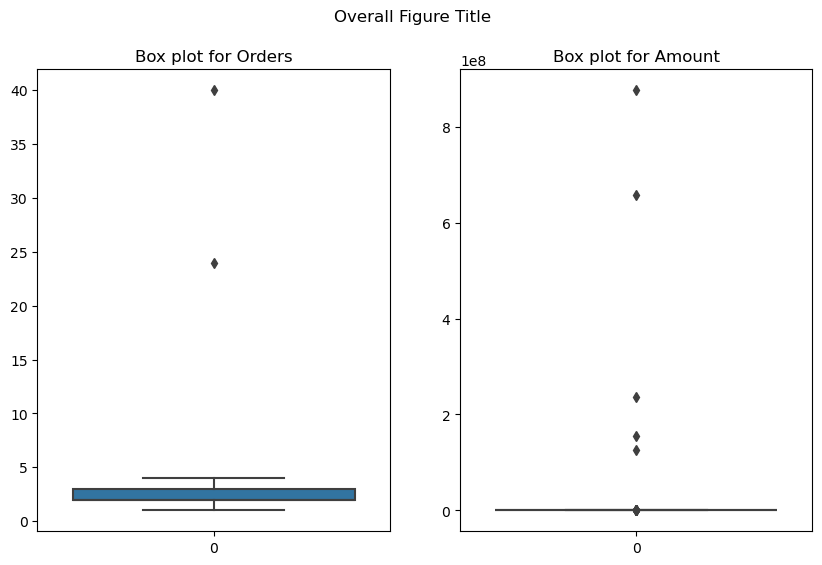

In [44]:
#Visualisation of outlier
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.boxplot(data=data['Orders'], ax=ax[0])
ax[0].set_title("Box plot for Orders")

sns.boxplot(data=data['Amount'], ax=ax[1])
ax[1].set_title("Box plot for Amount")

fig.suptitle('Overall Figure Title')

#### Order

In [45]:
Q1_orders = data["Orders"].quantile(0.25)
Q1_orders

2.0

In [46]:
Q3_orders = data["Orders"].quantile(0.75)
Q3_orders

3.0

In [47]:
IQR_orders = Q3_orders  - Q1_orders
IQR_orders

1.0

In [48]:
lower_limit_orders = Q1_orders - 1.5*IQR_orders
upper_limit_orders = Q3_orders + 1.5*IQR_orders

In [49]:
print(lower_limit_orders)
print(upper_limit_orders)

0.5
4.5


In [50]:
data = data[(data["Orders"]>lower_limit_orders) & (data["Orders"]<upper_limit_orders)]
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,married_status
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,Unmarried
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,Married
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,Married
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,Auto,2.0,23912.0,Unmarried
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877.0,Married


In [51]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125200e+04,11252.000000,11252.000000,11252.000000,1.125200e+04
mean,1.011889e+06,35.423303,0.419836,2.488891,1.917000e+05
std,2.979871e+05,12.753743,0.493554,1.114844,1.073001e+07
min,1.000001e+06,12.000000,0.000000,1.000000,1.880000e+02
25%,1.001496e+06,27.000000,0.000000,2.000000,5.444750e+03
50%,1.003064e+06,33.000000,0.000000,2.000000,8.113000e+03
75%,1.004429e+06,43.000000,1.000000,3.000000,1.269900e+04
max,1.100505e+07,92.000000,1.000000,4.000000,8.760212e+08


#### Amount

In [52]:
Q1_amount = data["Amount"].quantile(0.25)
Q1_amount

5444.75

In [53]:
Q3_amount = data["Amount"].quantile(0.75)
Q3_amount

12699.0

In [54]:
IQR_amount = Q3_amount - Q1_amount
IQR_amount

7254.25

In [55]:
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount

In [56]:
print(lower_limit_amount)
print(upper_limit_amount)

-5436.625
23580.375


In [57]:
data = data[(data["Amount"]>lower_limit_amount) & (data["Amount"]<upper_limit_amount)]
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,married_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


In [61]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


In [62]:
data.to_csv("Final_Diwali_Data.csv")

In [90]:
data.to_excel("Final_Diwali_Data1.xlsx")

## Exploratory Data Analysis

### Statistical Analysis

In [58]:
data.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,married_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married


### Data Visualisation

#### Gendre Wise Analysis

In [59]:
data_gender_order = data.groupby(["Gender"] , as_index = False)["Orders"].count()
print("Gendre wise order count:\n",data_gender_order)

data_gender_amount = data.groupby(["Gender"], as_index = False)["Amount"].sum()
print("Gendre wise amount:\n",data_gender_amount)

Gendre wise order count:
   Gender  Orders
0      F    7835
1      M    3399
Gendre wise amount:
   Gender       Amount
0      F  74422989.94
1      M  31769368.00


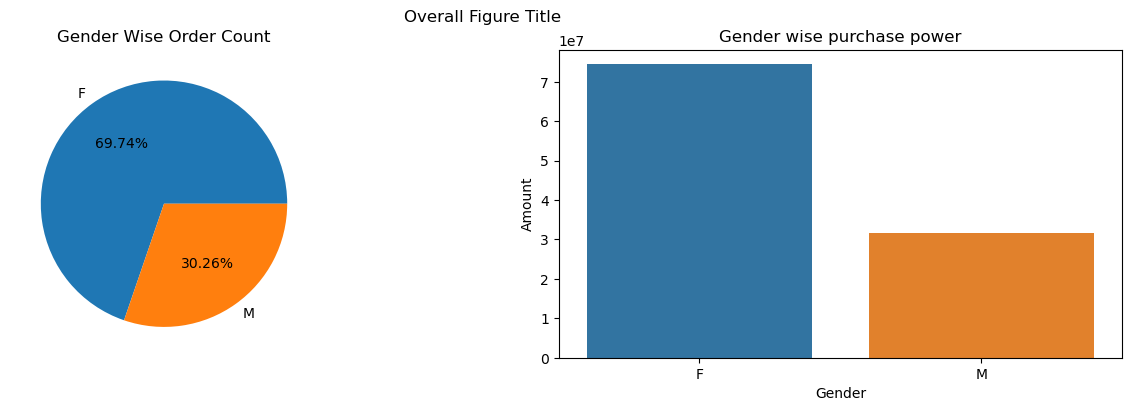

In [60]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 4))  
fig.suptitle('Overall Figure Title')
#Pie Plot
ax[0].pie(x = data_gender_order['Orders'], 
           labels = data_gender_order['Gender'], autopct = "%1.2f%%")

ax[0].set_title("Gender Wise Order Count")

# Bar Plot
sns.barplot(x = "Gender", y = "Amount", data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender wise purchase power")

plt.show()

### Conclusion
 - **Females generally places more order**
 - **Purchasing power of Females is Higher**

In [61]:
# Plot data
data_marraige_status_amount = data.groupby(['married_status'], as_index=False)['Amount'].sum()
data_marraige_status_amount

,married_status,Amount
0,Married,44003938.00
1,Unmarried,62188419.94


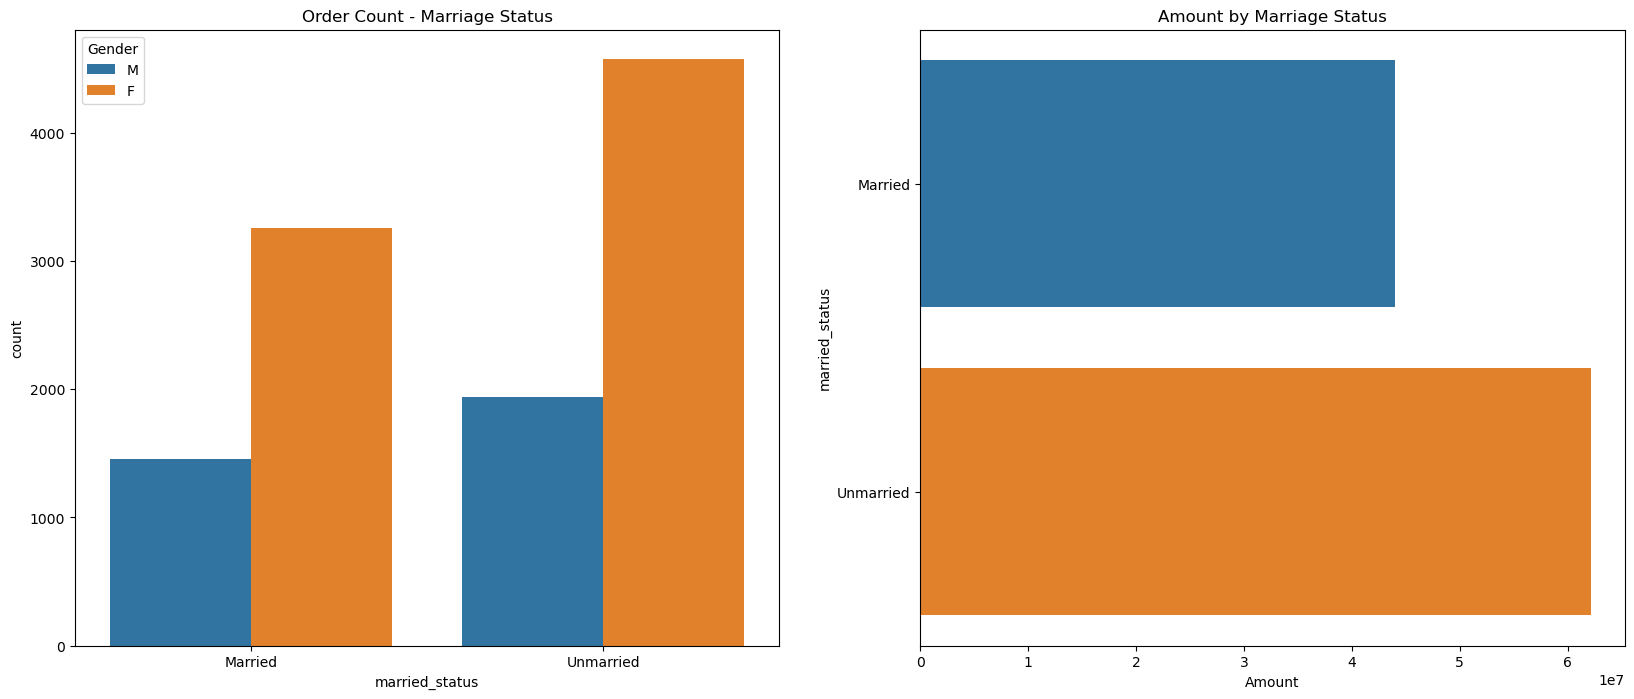

In [62]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Countplot
sns.countplot(x='married_status', hue='Gender', data=data, ax=ax[0])
ax[0].set_title("Order Count - Marriage Status")

# Bar chart
sns.barplot(y='married_status', x='Amount', orient='h', data=data_marraige_status_amount, ax=ax[1])
ax[1].set_title("Amount by Marriage Status")

# Show the plot
plt.show()

### Conclusion
- **Married women places more order**
- **Unmarried Women places more order**
- **Unmarraid people have higher purchasing power**

#### Age Group Analysis

In [63]:
# Plot data
data_age_group_amount = data.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42603794.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


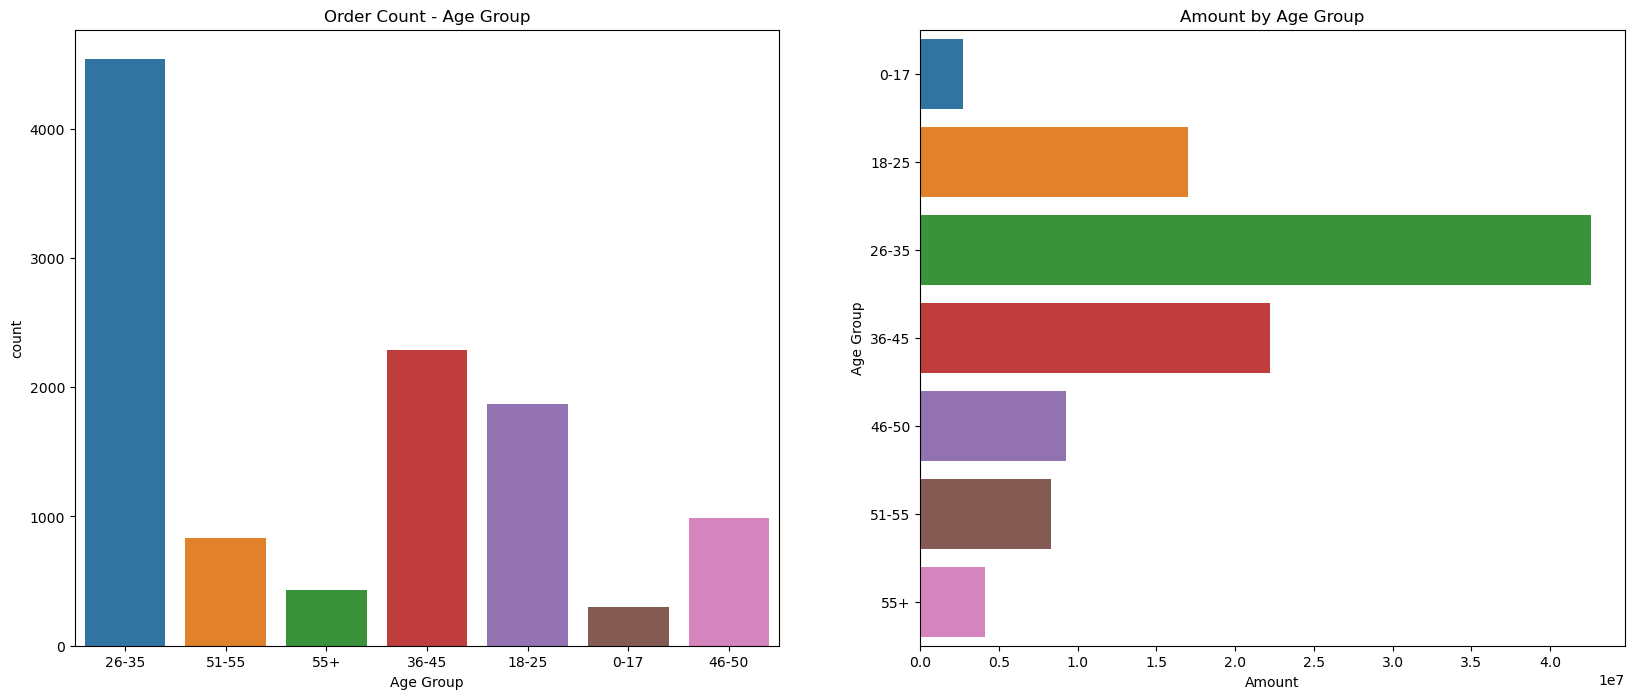

In [64]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Countplot
sns.countplot(x='Age Group', data=data, ax=ax[0])
ax[0].set_title("Order Count - Age Group")

# Bar chart
sns.barplot(y='Age Group', x='Amount', orient='h', data=data_age_group_amount, ax=ax[1])
ax[1].set_title("Amount by Age Group")

plt.show()

### Conclusion
- **Age Group(26-35) have highest number of orders**
- **Age Group(0-17) placed least number of orders**
- **Age Group(26-35) have highest purchasing power**
- **Age Group(0-17) placed least purchasing power**

#### Analysis Parameter
 - Gendre
 - Marriage Status
 - Age Group
 - Product_Category
 - Satate
 - Product_ID
 - Occupation

In [65]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,married_status
18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,Married
21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


In [66]:
order_count_category = data.groupby(['Product_Category'], as_index=False)['Orders'].sum()
category_count_top = order_count_category.sort_values('Orders', ascending=False).head(9)
category_count_top

,Product_Category,Orders
3,Clothing & Apparel,6627.0
6,Food,6110.0
5,Electronics & Gadgets,5208.0
7,Footwear & Shoes,2701.0
11,Household items,1331.0
1,Beauty,1086.0
9,Games & Toys,940.0
8,Furniture,895.0
14,Sports Products,870.0


In [67]:
amount_category = data.groupby(['Product_Category'], as_index=False)['Amount'].sum()
amount_category_top = amount_category.nlargest(9 , 'Amount')
amount_category_top

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16484472.00
7,Footwear & Shoes,16009057.45
5,Electronics & Gadgets,15607657.00
8,Furniture,5481325.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1624503.00


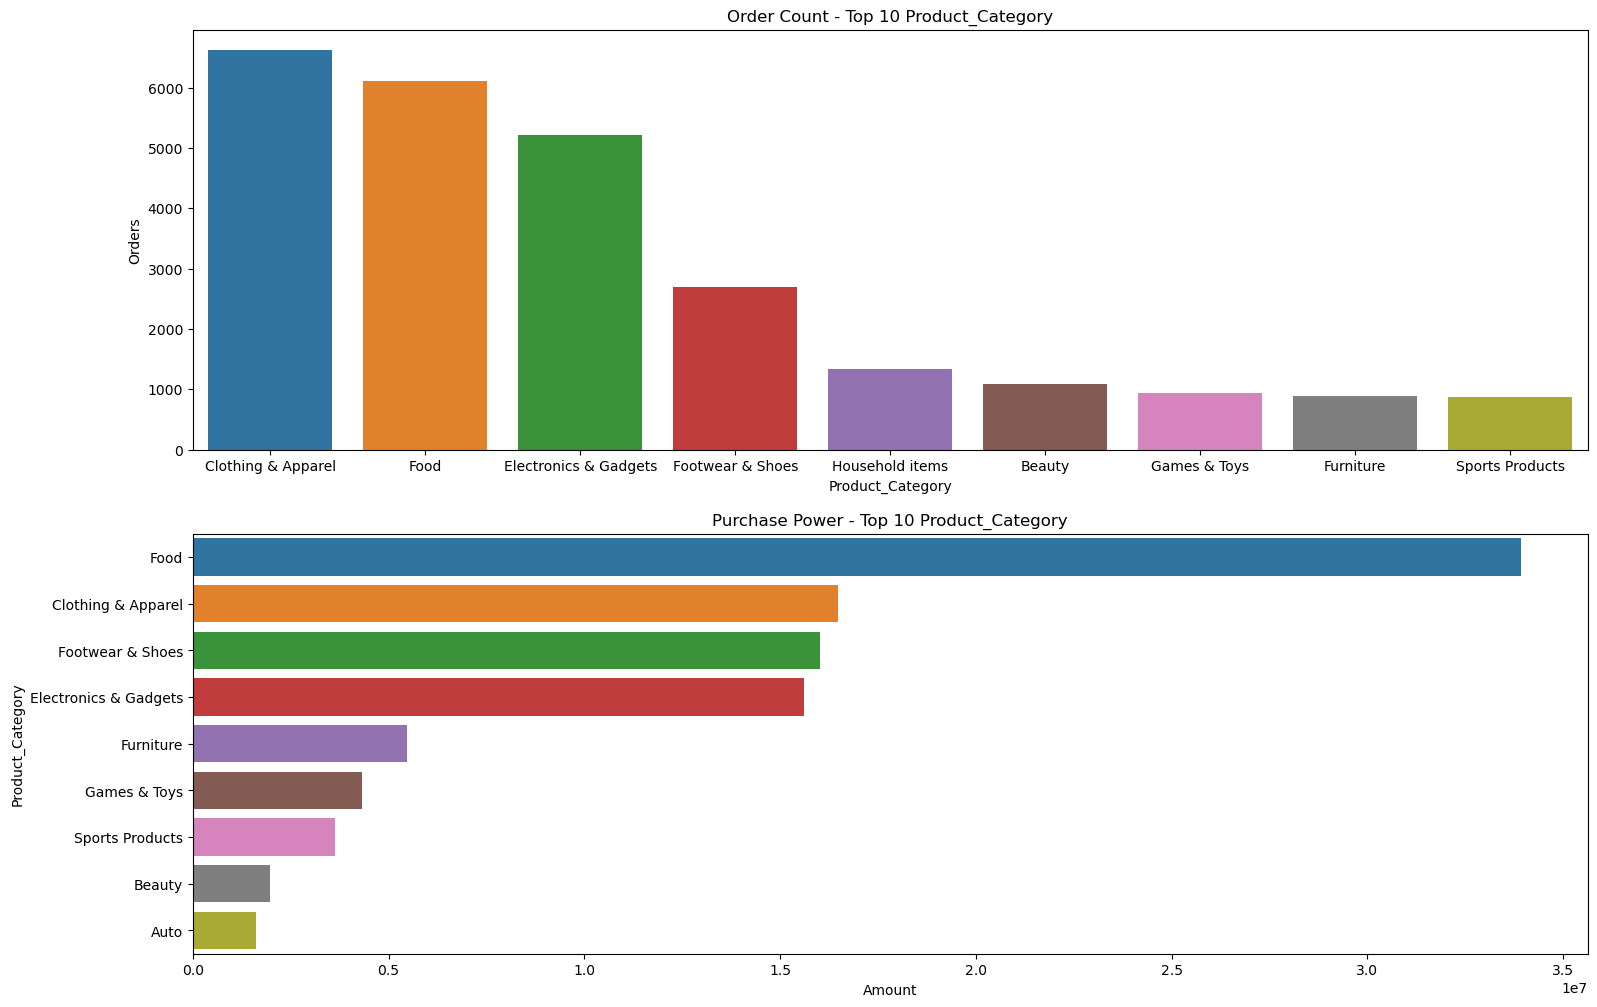

In [68]:
# Plots
fig, ax = plt.subplots(2,1, figsize=(18, 12))

# Countplot
sns.barplot(x='Product_Category', y='Orders', data=category_count_top, ax=ax[0])
ax[0].set_title("Order Count - Top 10 Product_Category")
# Bar chart
sns.barplot(y='Product_Category', x='Amount', orient='h', data=amount_category_top, ax=ax[1])
ax[1].set_title("Purchase Power - Top 10 Product_Category")
plt.subplots_adjust(hspace=0.2)
plt.show()

### Conclusion
- **Clothing & Apparel have highest demand and Sports Products	have least demand among top 9**
- **Money spent on Food is highest and on Auto is lowest**

In [69]:
order_count = data.groupby(['State'], as_index=False)['Orders'].sum()
order_count_top = order_count.sort_values('Orders', ascending=False).head(5)
order_count_top

,State,Orders
14,Uttar Pradesh,4805.0
10,Maharashtra,3799.0
7,Karnataka,3266.0
2,Delhi,2728.0
9,Madhya Pradesh,2253.0


In [70]:
amount_state = data.groupby(['State'], as_index=False)['Amount'].sum()
amount_state_top = amount_state.nlargest(5 , 'Amount')
amount_state_top

,State,Amount
14,Uttar Pradesh,19360148.00
10,Maharashtra,14400762.00
7,Karnataka,13705829.00
2,Delhi,11554343.95
9,Madhya Pradesh,8100944.00


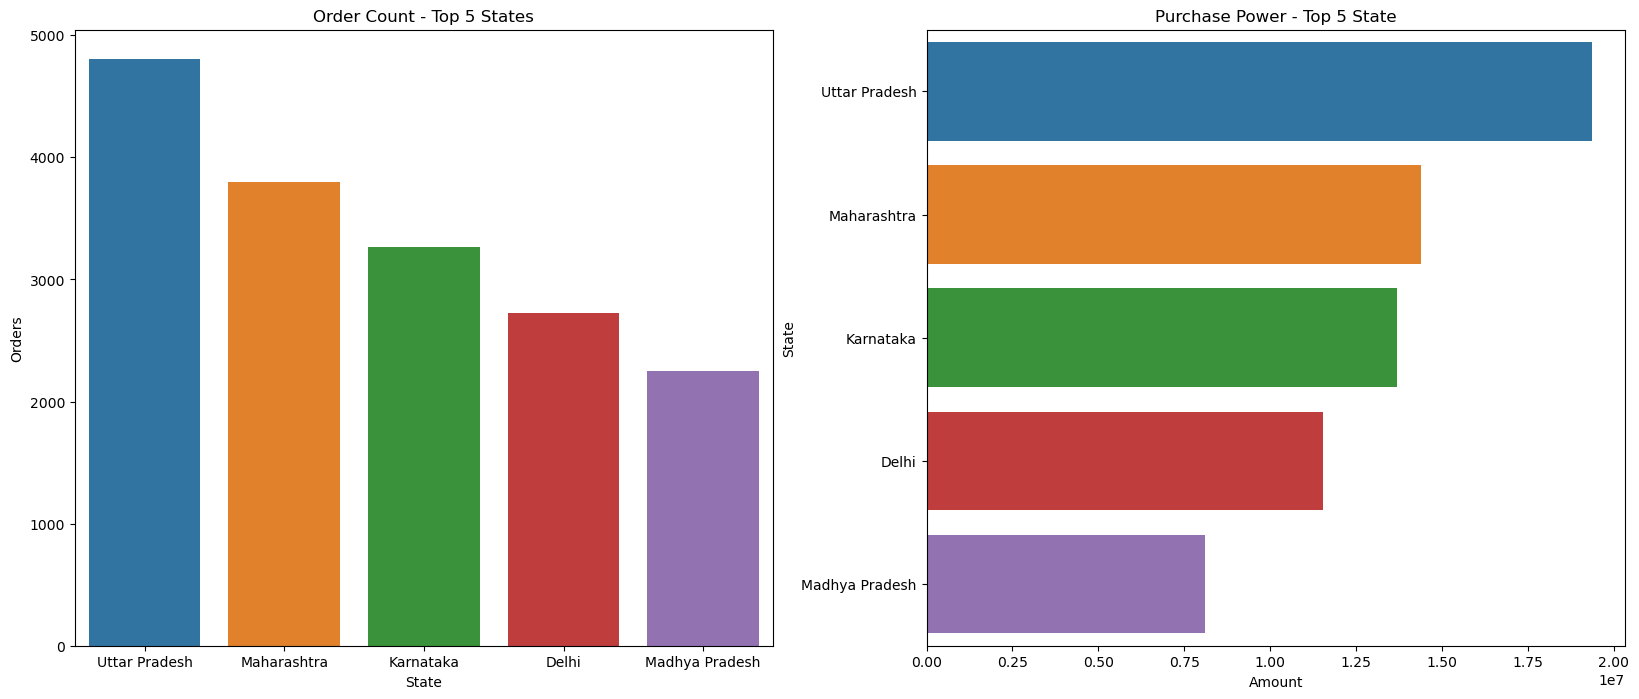

In [71]:
# Plots
fig, ax = plt.subplots(1,2, figsize=(20, 8))

# Countplot
sns.barplot(x='State', y='Orders', data=order_count_top, ax=ax[0])
ax[0].set_title("Order Count - Top 5 States")

# Bar chart
sns.barplot(y='State', x='Amount', orient='h', data=amount_state_top, ax=ax[1])
ax[1].set_title("Purchase Power - Top 5 State")
plt.subplots_adjust(wspace=0.22)
plt.show()

### Conclusion
- **Uttar Pradesh have highest number of orders and Madhya Pradesh have least among top 5**
- **Uttar Pradesh is top in purchasing power and Madhya Pradesh is at bottom among top 5**

In [72]:
order_ID = data.groupby(['Product_ID'], as_index=False)['Orders'].sum()
order_ID_top = order_ID.sort_values('Orders', ascending=False).head(8)
order_ID_top

,Product_ID,Orders
1678,P00265242,131.0
644,P00110942,113.0
1503,P00237542,91.0
1146,P00184942,82.0
171,P00025442,79.0
679,P00114942,79.0
708,P00117942,76.0
298,P00044442,75.0


In [73]:
amount_ID = data.groupby(['Product_ID'], as_index=False)['Amount'].sum()
amount_ID_top = amount_ID.nlargest(8 , 'Amount')
amount_ID_top

,Product_ID,Amount
1678,P00265242,561461.0
1146,P00184942,401816.0
644,P00110942,400899.0
396,P00059442,359230.0
654,P00112142,341020.0
1503,P00237542,322363.0
388,P00058042,307040.0
642,P00110742,294548.0


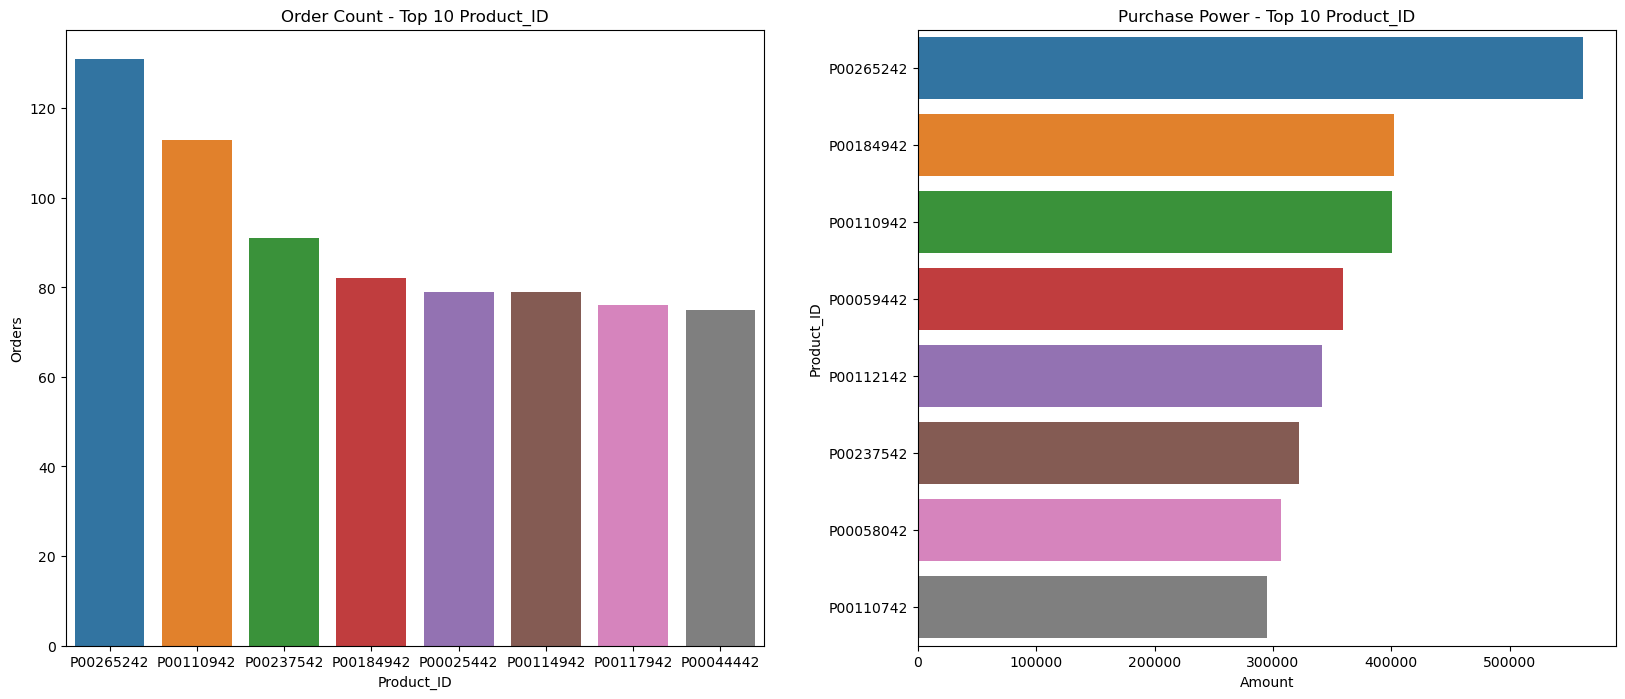

In [74]:
# Plots
fig, ax = plt.subplots(1,2, figsize=(20, 8))

# Countplot
sns.barplot(x='Product_ID', y='Orders', data=order_ID_top, ax=ax[0])
ax[0].set_title("Order Count - Top 10 Product_ID")

# Bar chart
sns.barplot(y='Product_ID', x='Amount', orient='h', data=amount_ID_top, ax=ax[1])
ax[1].set_title("Purchase Power - Top 10 Product_ID")

plt.subplots_adjust(wspace=0.22)
plt.show()

### Conclusion 
-  **P00265242 has highest order**
-  **Purchasing power of P00265242 is highest** 

In [75]:
data['Occupation'].unique()

array(['Hospitality', 'Govt', 'Banking', 'IT Sector', 'Automobile',
       'Aviation', 'Food Processing', 'Media', 'Healthcare',
       'Agriculture', 'Construction', 'Retail', 'F', 'Textile', 'Lawyer',
       'Chemical'], dtype=object)

In [76]:
order_occupation = data.groupby(['Occupation'], as_index=False)['Orders'].sum()
order_occupation_top = order_occupation.sort_values('Orders', ascending=False).head(8)
order_occupation_top

,Occupation,Orders
11,IT Sector,3992.0
9,Healthcare,3453.0
2,Aviation,3211.0
3,Banking,2819.0
8,Govt,2144.0
10,Hospitality,1738.0
13,Media,1597.0
1,Automobile,1367.0


In [77]:
amount_occupation = data.groupby(['Occupation'], as_index=False)['Amount'].sum()
amount_occupation_top = amount_occupation.nlargest(8 , 'Amount')
amount_occupation_top

,Occupation,Amount
11,IT Sector,14797553.00
9,Healthcare,12989061.49
2,Aviation,12596751.00
3,Banking,10767299.45
8,Govt,8425182.00
10,Hospitality,6402793.00
13,Media,6291535.00
1,Automobile,5362757.00


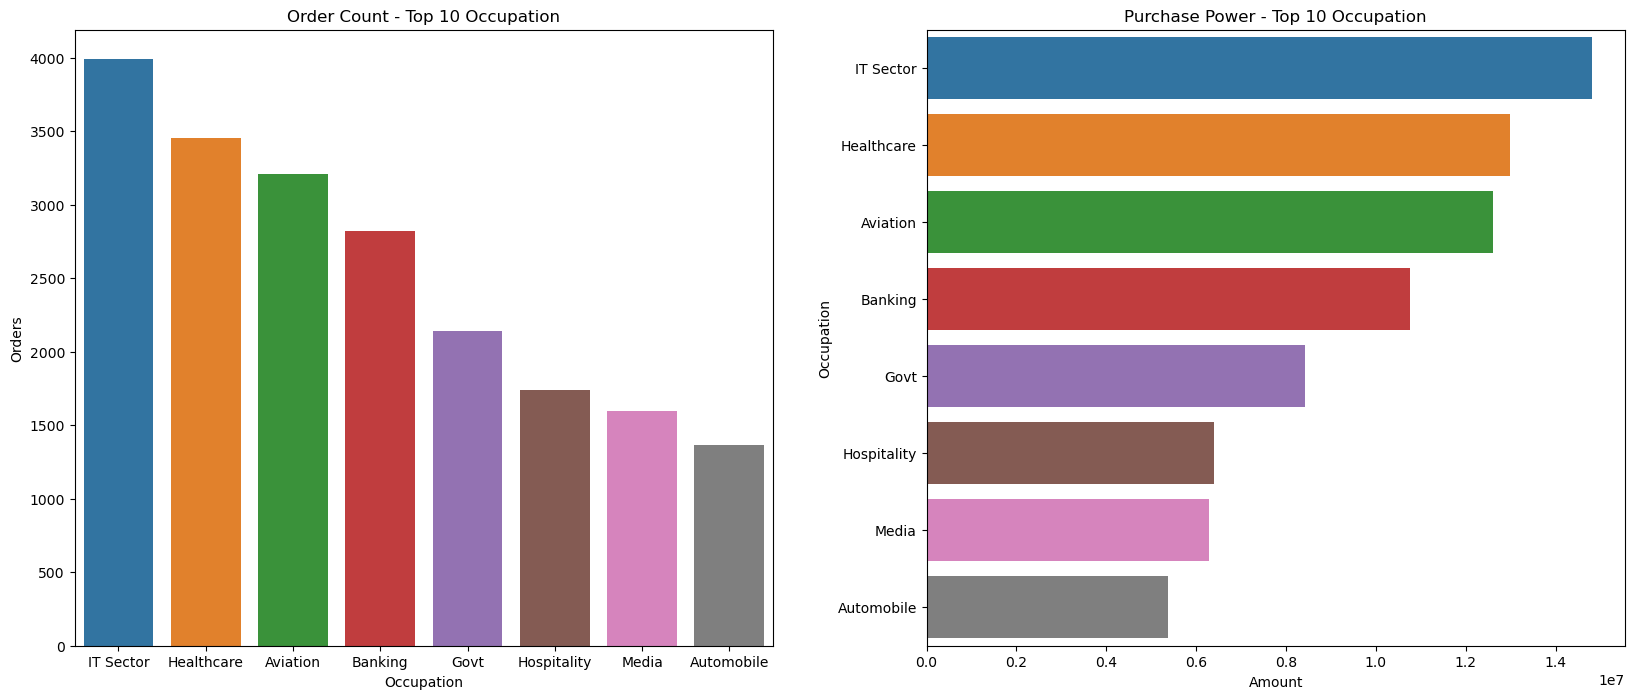

In [78]:
# Plots
fig, ax = plt.subplots(1,2, figsize=(20, 8))

# Countplot
sns.barplot(x='Occupation', y='Orders', data=order_occupation_top, ax=ax[0])
ax[0].set_title("Order Count - Top 10 Occupation")

# Bar chart
sns.barplot(y='Occupation', x='Amount', orient='h', data=amount_occupation_top, ax=ax[1])
ax[1].set_title("Purchase Power - Top 10 Occupation")

plt.subplots_adjust(wspace=0.22)
plt.show()

### Conclusion 
- **People working in IT Sector placed highest order**
- **People in IT Sector has highest purchasing power**

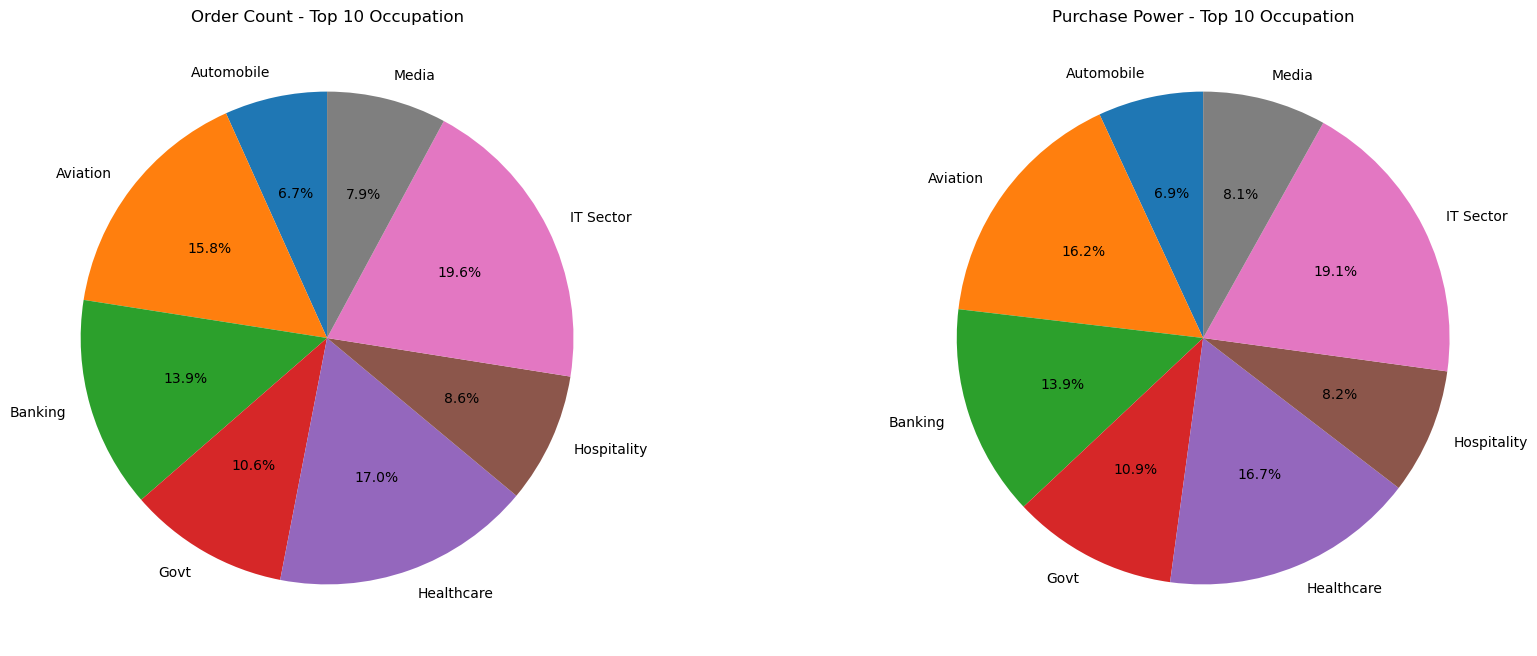

In [79]:
# Data for plotting
order_occupation_data = order_occupation_top.groupby('Occupation')['Orders'].sum()
amount_occupation_data = amount_occupation_top.groupby('Occupation')['Amount'].sum()

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Order count pie chart
ax[0].pie(order_occupation_data, labels=order_occupation_data.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Order Count - Top 10 Occupation")

# Purchase power pie chart
ax[1].pie(amount_occupation_data, labels=amount_occupation_data.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title("Purchase Power - Top 10 Occupation")

plt.subplots_adjust(wspace=0.3)
plt.show()

In [80]:
data['Zone'].unique()

array(['Central', 'Southern', 'Western', 'Eastern', 'Northern'],
      dtype=object)

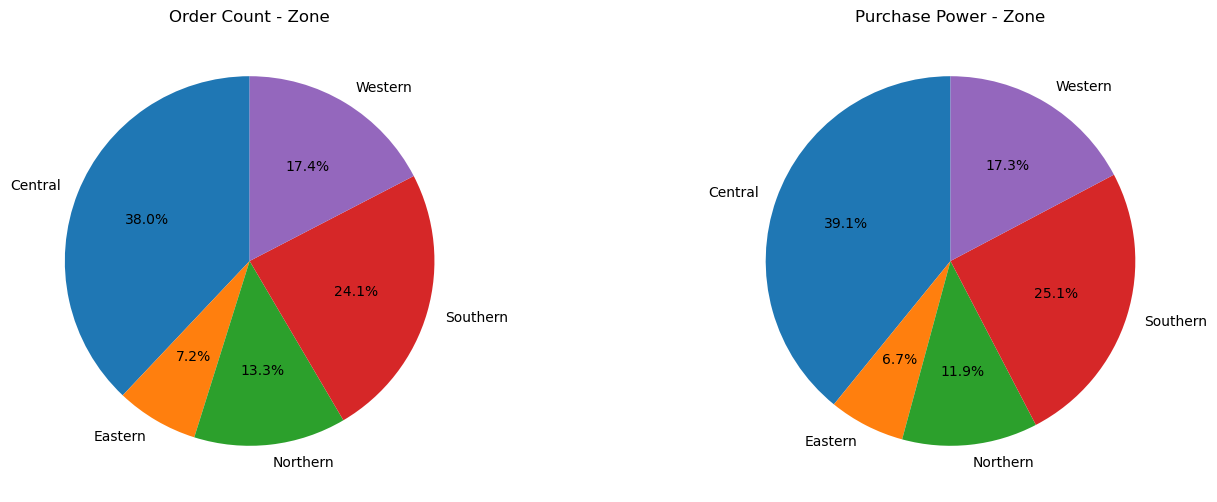

In [83]:
order_zone_data = data.groupby('Zone')['Orders'].sum()
amount_zone_data = data.groupby('Zone')['Amount'].sum()
# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Order count pie chart
ax[0].pie(order_zone_data, labels=order_zone_data.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Order Count - Zone")

# Purchase power pie chart
ax[1].pie(amount_zone_data, labels=amount_zone_data.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title("Purchase Power - Zone")

plt.subplots_adjust(wspace=0.3)
plt.show()